In [2]:
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
sdf_calls_path = os.path.join("benchmarks", "performance")

naive_folder = os.path.join(sdf_calls_path, "naive")
relaxed_folder = os.path.join(sdf_calls_path, "relaxed")
enhanced_folder = os.path.join(sdf_calls_path, "enhanced")
cone_folder = os.path.join(sdf_calls_path, "cone")

if (not (os.path.isdir(naive_folder) and os.path.isdir(relaxed_folder) and os.path.isdir(enhanced_folder) and os.path.isdir(cone_folder))):
    print("couldn't find/open the necesseary directories")

In [4]:
benchmark_filenames = {}

for dir_name in os.listdir(sdf_calls_path):
    sub_dir_path = os.path.join(sdf_calls_path, dir_name)
    if (os.path.isdir(sub_dir_path)):
        benchmark_filenames[dir_name] = os.listdir(sub_dir_path)

In [5]:
benchmark_images = {}

for method, filenames in benchmark_filenames.items():
    folder_path = os.path.join(sdf_calls_path, method)

    benchmark_images[method] = []
    for filename in filenames:
        benchmark_file_path = os.path.join(folder_path, filename)
        benchmark_image_bgr = cv2.imread(benchmark_file_path)
        max_iteration_count = int((os.path.basename(benchmark_file_path).split(".")[-2]).split("_")[-1])
        benchmark_images[method].append((max_iteration_count, benchmark_image_bgr))

    benchmark_images[method].sort(key=lambda x: x[0])
        

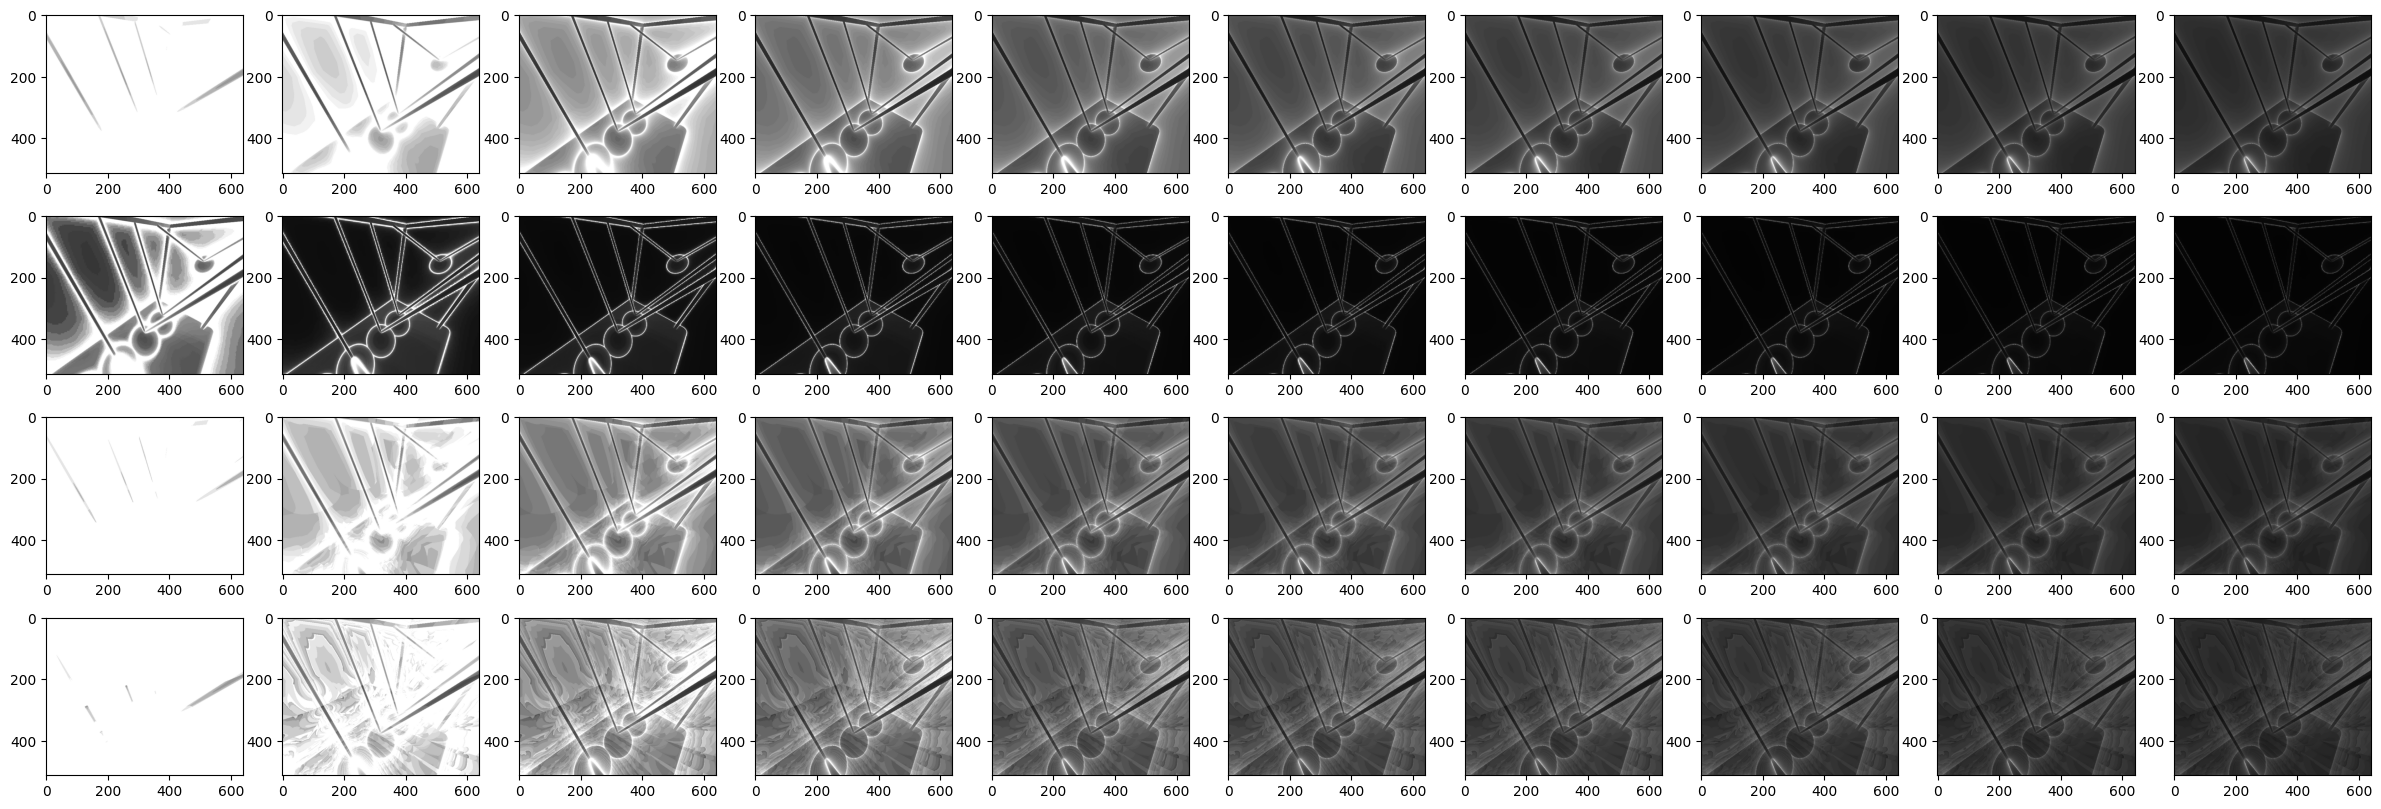

In [6]:
h = len(benchmark_images)
w = max([len(images) for _, images in benchmark_images.items()])

fig = plt.figure(figsize=(30, 10))

for y, (method, images) in enumerate(benchmark_images.items()):
    for x, (max_iteration_count, image_bgr) in enumerate(images):
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        
        index = y * w + x + 1
        fig.add_subplot(h, w, index)
        plt.imshow(image_rgb)

plt.show()

In [22]:
for method, images in benchmark_images.items():
    print(method, end=": ")
    for (max_iteration_count, image_bgr) in images:
        image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

        sdf_count_sum = int((cv2.sumElems(image_gray)[0] / 255.0) * max_iteration_count)

        #print(image_gray.shape[0], image_gray.shape[1])
        avg_sdf_count_per_pixel = sdf_count_sum / (image_gray.shape[0] * image_gray.shape[1])

        print(round(avg_sdf_count_per_pixel, 2), end=" ")

    print()

naive: 9.9 18.16 20.69 21.16 21.25 21.25 21.28 21.29 21.27 21.3 
cone: 6.41 4.26 3.87 3.78 3.74 3.74 3.73 3.74 3.72 3.74 
relaxed: 9.97 17.02 18.35 18.56 18.57 18.56 18.6 18.6 18.56 18.58 
enhanced: 9.96 17.96 20.0 20.29 20.3 20.28 20.31 20.3 20.28 20.3 
